In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('merc_train.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GLC Class,2019.000000,45299,Semi-Auto,2792.0,Diesel,145.0,40.4,2.0
1,unknown,2018.000000,19099,Semi-Auto,12321.0,Petrol,145.0,56.5,1.5
2,A Class,2019.000000,17702,Automatic,0.0,Diesel,145.0,68.9,1.5
3,unknown,2017.333333,21749,Semi-Auto,27178.0,Diesel,160.0,51.4,2.0
4,E Class,2018.000000,35950,Automatic,0.0,Diesel,0.0,42.8,3.0


Histogram for year


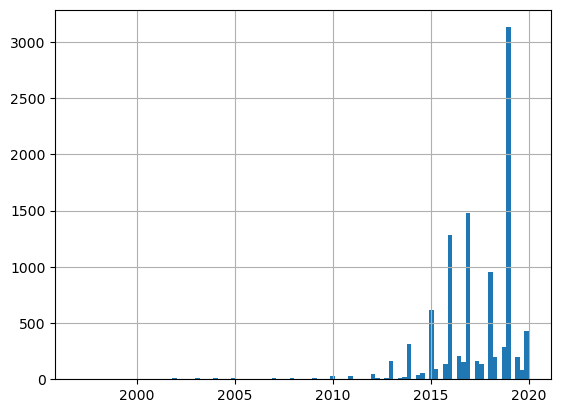

Histogram for price


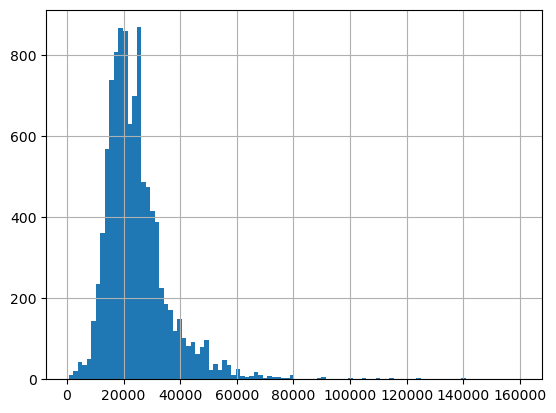

Histogram for mileage


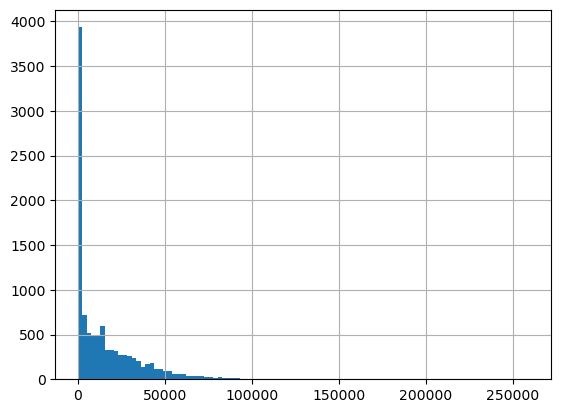

Histogram for tax


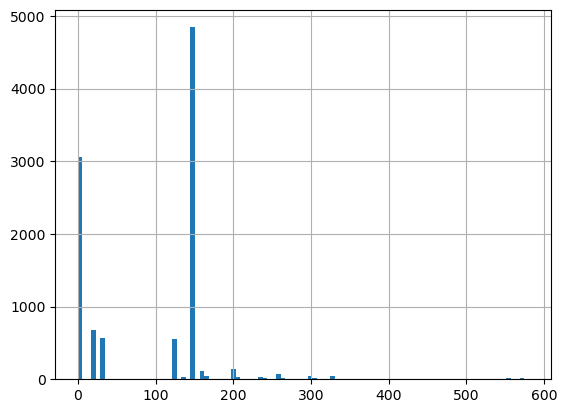

Histogram for mpg


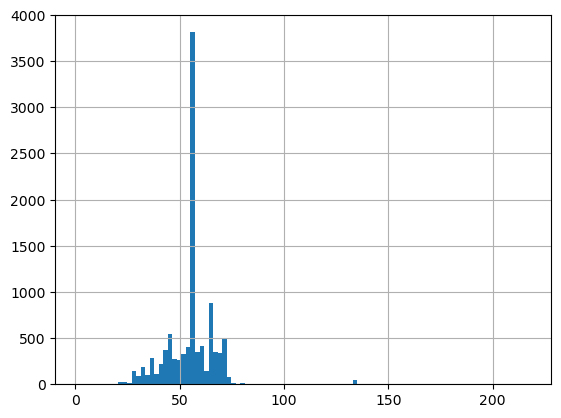

Histogram for engineSize


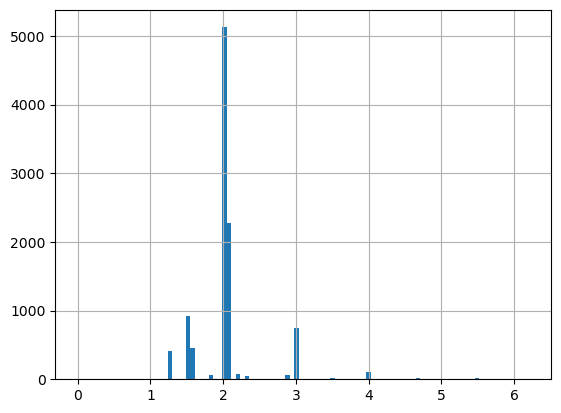

In [3]:
import matplotlib.pyplot as plt

num_cols = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

for col in num_cols:
  print(f'Histogram for {col}')
  df[col].hist(bins=100)
  plt.show()

In [4]:
def calculate_iqr_boundaries(series):
  q25 = series.quantile(0.25)
  q75 = series.quantile(0.75)
  iqr = q75 - q25

  boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
  return boundaries

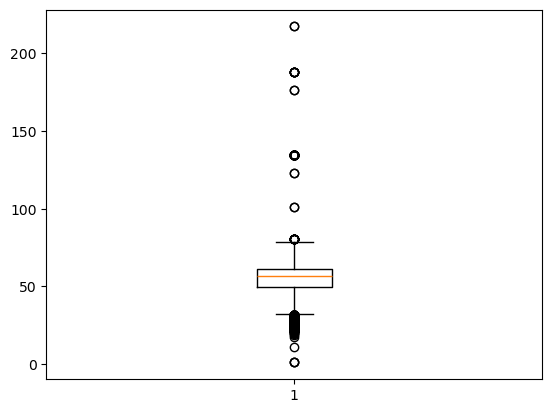

In [5]:
plt.boxplot(df.mpg)
plt.show()

In [6]:
mpg_bounds = calculate_iqr_boundaries(df['mpg'])
mpg_bounds

(np.float64(31.900000000000006), np.float64(79.1))

In [7]:
df_1 = df[(df['mpg'] >= mpg_bounds[0]) & (df['mpg'] <= mpg_bounds[1])]

print(df_1.shape[0])
print(df_1.shape[0] / df.shape[0])

9927
0.9556218713900655


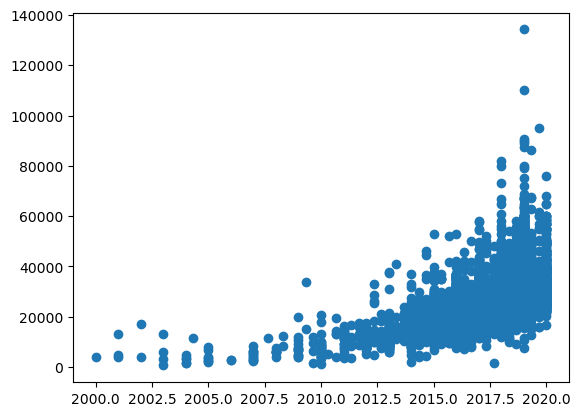

In [8]:
plt.scatter(df_1['year'], df_1['price'])

In [9]:
from sklearn.ensemble import IsolationForest

In [10]:
isf = IsolationForest(n_estimators=100, contamination=0.005, random_state=42)
y_pred = isf.fit_predict(df_1[['year', 'price']])

In [11]:
df_1['price_year_outlier'] = y_pred
df_1.head()

C:\Users\Rashid\AppData\Local\Temp\ipykernel_23652\3753726104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['price_year_outlier'] = y_pred


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_year_outlier
0,GLC Class,2019.000000,45299,Semi-Auto,2792.0,Diesel,145.0,40.4,2.0,1
1,unknown,2018.000000,19099,Semi-Auto,12321.0,Petrol,145.0,56.5,1.5,1
2,A Class,2019.000000,17702,Automatic,0.0,Diesel,145.0,68.9,1.5,1
3,unknown,2017.333333,21749,Semi-Auto,27178.0,Diesel,160.0,51.4,2.0,1
4,E Class,2018.000000,35950,Automatic,0.0,Diesel,0.0,42.8,3.0,1


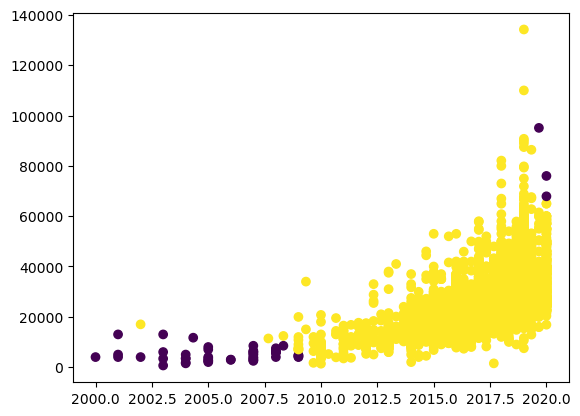

In [12]:
plt.scatter(df_1['year'], df_1['price'], c=df_1['price_year_outlier'])

In [13]:
df_2 = df_1[df_1['price_year_outlier'] == 1]
df_2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_year_outlier
0,GLC Class,2019.000000,45299,Semi-Auto,2792.0,Diesel,145.0,40.4,2.0,1
1,unknown,2018.000000,19099,Semi-Auto,12321.0,Petrol,145.0,56.5,1.5,1
2,A Class,2019.000000,17702,Automatic,0.0,Diesel,145.0,68.9,1.5,1
3,unknown,2017.333333,21749,Semi-Auto,27178.0,Diesel,160.0,51.4,2.0,1
4,E Class,2018.000000,35950,Automatic,0.0,Diesel,0.0,42.8,3.0,1


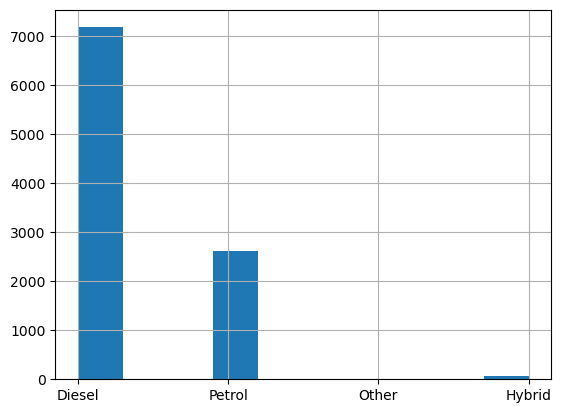

In [14]:
df_2['fuelType'].hist()
plt.show()

In [15]:
serie = df_2['fuelType'].value_counts()
serie

fuelType
Diesel    7181
Petrol    2624
Hybrid      71
Other        1
Name: count, dtype: int64

In [16]:
serie = serie / serie.sum() * 100
serie

fuelType
Diesel    72.704262
Petrol    26.566771
Hybrid     0.718842
Other      0.010125
Name: count, dtype: float64

In [17]:
keep_cats = serie[serie > 5].index
keep_cats

Index(['Diesel', 'Petrol'], dtype='object', name='fuelType')

C:\Users\Rashid\AppData\Local\Temp\ipykernel_23652\3880924308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['fuelType'] = np.where(df_2['fuelType'].isin(keep_cats), df_2['fuelType'], 'Other')


<Axes: >

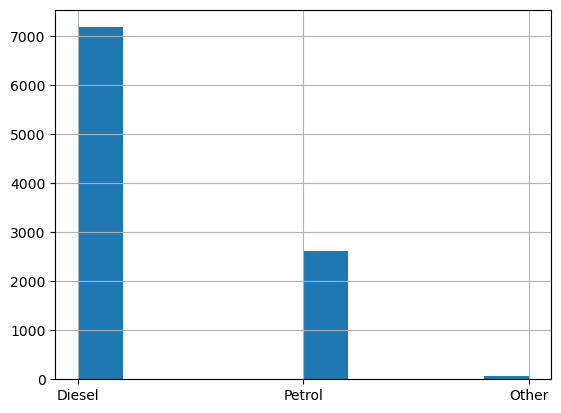

In [18]:
import numpy as np

df_2['fuelType'] = np.where(df_2['fuelType'].isin(keep_cats), df_2['fuelType'], 'Other')
df_2['fuelType'].hist()

In [19]:
df_2.to_csv('merc_train_2.csv', index=False)